In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv('data/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [7]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
#show null values in each column
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [9]:
# Drop the year column
df.drop(columns=['Crop_Year'],inplace=True)

In [10]:
# Remove leading/trailing spaces in categorical columns
df['Season'] = df['Season'].str.strip()
df['State'] = df['State'].str.strip()
df['Crop'] = df['Crop'].str.strip()

In [11]:
#See unique values and their counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print(df[i].nunique())

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [12]:
cat_cols1=[]
num_cols1=[]

for i in df.columns:
    if df[i].dtype=='object':
        cat_cols1.append(i)
    else:
        num_cols1.append(i)

print(cat_cols1)
print(num_cols1)

['Crop', 'Season', 'State']
['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']


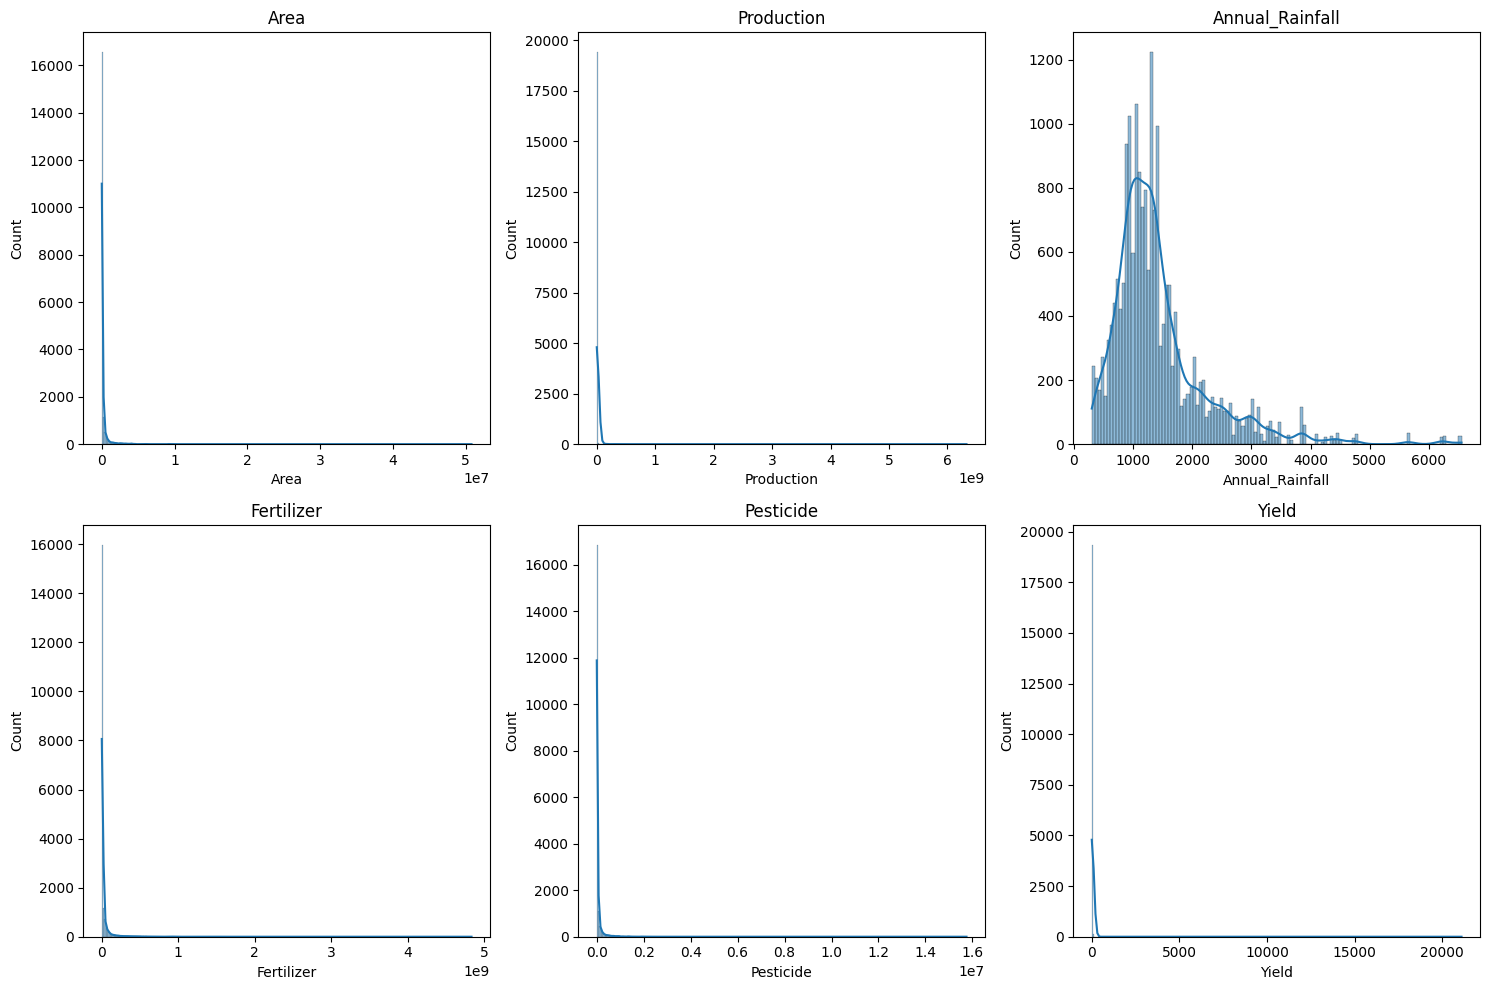

In [13]:
n = len(num_cols1)   # total number of numeric columns
rows = math.ceil(n / 3)      # rows needed for 3 per row

fig,axes = plt.subplots(rows,3,figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols1):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
# Skewness of numerical columns
for i in num_cols1:
    print(f'{i} : {df[i].skew()}')

Area : 21.858217797355426
Production : 19.299193411606723
Annual_Rainfall : 2.131785011464436
Fertilizer : 13.412598810025761
Pesticide : 25.635746086843607
Yield : 12.785264685628688


In [15]:
# Kurtosis of numerical columns
for i in num_cols1:
    print(f'{i} : {df[i].kurtosis()}')

Area : 1202.6249678574002
Production : 388.56723886008297
Annual_Rainfall : 6.97498304618661
Fertilizer : 408.4541019821852
Pesticide : 1546.7276228094033
Yield : 175.57732334193412


In [16]:
#Splitting the data into X and y
X=df.drop(columns=['Yield'])
y=df['Yield']

In [17]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
cat_cols=[]
num_cols=[]

for i in X.columns:
    if X[i].dtype=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

print(cat_cols)
print(num_cols)

['Crop', 'Season', 'State']
['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']


In [19]:
# Target Encoding for 'Crop' column
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Crop'])
X_train['Crop'] = encoder.fit_transform(X_train['Crop'], y_train)
X_test['Crop'] = encoder.transform(X_test['Crop'])

In [20]:
# Power Transformation for numerical columns
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X_train[num_cols] = pt.fit_transform(X_train[num_cols])
X_test[num_cols] = pt.transform(X_test[num_cols])

pt_y = PowerTransformer(method='yeo-johnson')
y_train = pt_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = pt_y.transform(y_test.values.reshape(-1, 1))


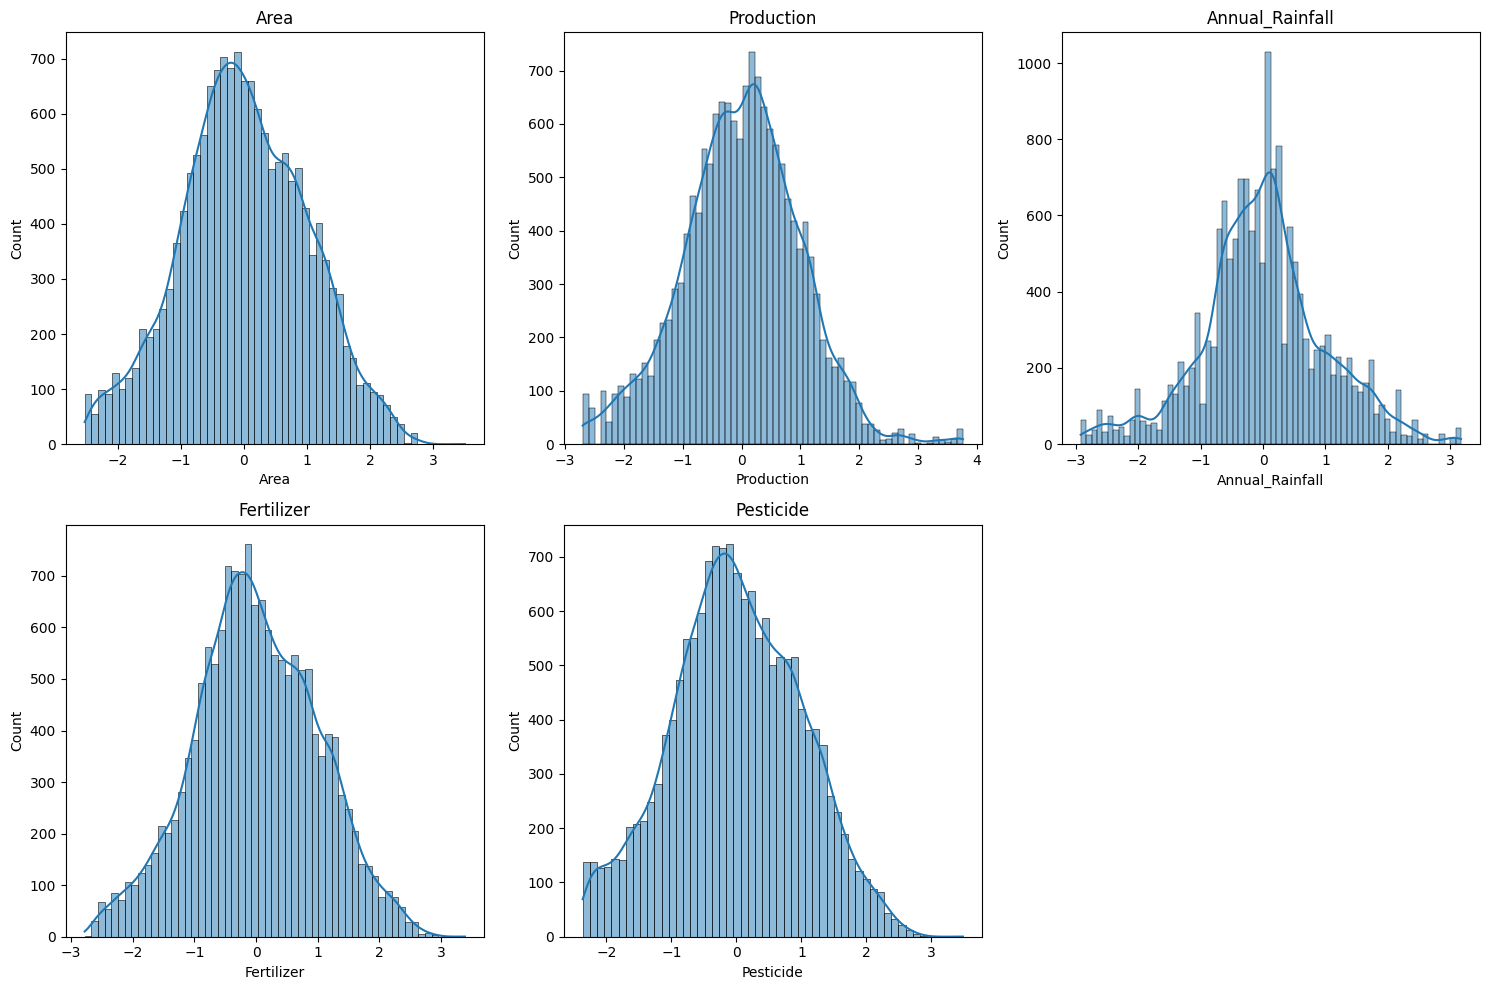

In [21]:
n = len(num_cols)   # total number of numeric columns
rows = math.ceil(n / 3)      # rows needed for 3 per row

fig,axes = plt.subplots(rows,3,figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(X_train[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
for i in num_cols:
    print(f'{i} : {X_train[i].skew()}')

Area : -0.012218648824013125
Production : -2.8445424533709317e-05
Annual_Rainfall : -0.004509391318505184
Fertilizer : -0.010402912196556606
Pesticide : -0.012237710807002242


In [23]:
for i in num_cols:
    print(f'{i} : {X_train[i].kurtosis()}')

Area : -0.28965749954304254
Production : 0.3926334618005969
Annual_Rainfall : 0.6036758390711232
Fertilizer : -0.22899868652721045
Pesticide : -0.36244815074044245


In [24]:
X_train

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
19466,1.364905,Kharif,Goa,-1.075788,-0.715962,1.907533,-1.006257,-1.017955
17802,1.569136,Kharif,Delhi,-1.522011,-1.187932,-1.238092,-1.515720,-1.679552
7014,0.525413,Whole Year,Uttar Pradesh,-1.239694,-1.428779,-0.699476,-1.300878,-1.248039
14078,1.569136,Rabi,Uttarakhand,0.247029,0.197346,0.054274,0.286890,0.336490
8121,1.789119,Kharif,Madhya Pradesh,1.485555,0.978650,-0.898001,1.350606,1.458014
...,...,...,...,...,...,...,...,...
11284,2.224730,Summer,Uttar Pradesh,0.303600,0.457541,-1.535909,0.355253,0.158487
11964,3.677745,Rabi,West Bengal,0.176462,0.547986,-0.266352,0.249650,0.153176
5390,13.574094,Rabi,Tamil Nadu,0.161705,0.719556,-0.509279,0.215802,0.300358
860,0.695739,Kharif,Karnataka,0.259329,0.074258,-0.444156,0.161187,0.264169


In [25]:
#one-hot encoding for 'Season' and 'State' columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

X_ohe = ohe.fit(X_train[['Season','State']])
X_ohe = ohe.transform(X_train[['Season','State']])
X_ohe_test = ohe.transform(X_test[['Season','State']])
ohe.get_feature_names_out(['Season','State'])

X_ohe = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(['Season','State']))
X_ohe_test = pd.DataFrame(X_ohe_test, columns=ohe.get_feature_names_out(['Season','State']))

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train, X_ohe], axis=1)
X_test = pd.concat([X_test, X_ohe_test], axis=1)

X_train.drop(columns=['Season','State'], inplace=True)
X_test.drop(columns=['Season','State'], inplace=True)

X_train

,Crop,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1.364905,-1.075788,-0.715962,1.907533,-1.006257,-1.017955,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.569136,-1.522011,-1.187932,-1.238092,-1.515720,-1.679552,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.525413,-1.239694,-1.428779,-0.699476,-1.300878,-1.248039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.569136,0.247029,0.197346,0.054274,0.286890,0.336490,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.789119,1.485555,0.978650,-0.898001,1.350606,1.458014,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,2.224730,0.303600,0.457541,-1.535909,0.355253,0.158487,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15747,3.677745,0.176462,0.547986,-0.266352,0.249650,0.153176,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15748,13.574094,0.161705,0.719556,-0.509279,0.215802,0.300358,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15749,0.695739,0.259329,0.074258,-0.444156,0.161187,0.264169,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train.columns

Index(['Crop', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Season_Autumn', 'Season_Kharif', 'Season_Rabi',
       'Season_Summer', 'Season_Whole Year', 'Season_Winter',
       'State_Andhra Pradesh', 'State_Arunachal Pradesh', 'State_Assam',
       'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Goa',
       'State_Gujarat', 'State_Haryana', 'State_Himachal Pradesh',
       'State_Jammu and Kashmir', 'State_Jharkhand', 'State_Karnataka',
       'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland',
       'State_Odisha', 'State_Puducherry', 'State_Punjab', 'State_Sikkim',
       'State_Tamil Nadu', 'State_Telangana', 'State_Tripura',
       'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal'],
      dtype='object')

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop                     15751 non-null  float64
 1   Area                     15751 non-null  float64
 2   Production               15751 non-null  float64
 3   Annual_Rainfall          15751 non-null  float64
 4   Fertilizer               15751 non-null  float64
 5   Pesticide                15751 non-null  float64
 6   Season_Autumn            15751 non-null  float64
 7   Season_Kharif            15751 non-null  float64
 8   Season_Rabi              15751 non-null  float64
 9   Season_Summer            15751 non-null  float64
 10  Season_Whole Year        15751 non-null  float64
 11  Season_Winter            15751 non-null  float64
 12  State_Andhra Pradesh     15751 non-null  float64
 13  State_Arunachal Pradesh  15751 non-null  float64
 14  State_Assam           

In [28]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [30]:
model = CatBoostRegressor(task_type="GPU", verbose=0)

model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))


Model performance for Training set
- Root Mean Squared Error: 0.1533
- Mean Absolute Error: 0.1036
- R2 Score: 0.9765
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1564
- Mean Absolute Error: 0.1085
- R2 Score: 0.9749


In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [1000, 1500, 500]
}

catboost_model = CatBoostRegressor(task_type='GPU', verbose=0)

grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'depth': 8, 'iterations': 1500, 'learning_rate': 0.1}
Best RMSE: 0.1639871835979553


In [31]:
#Assigning best parameters to the model
model = CatBoostRegressor(task_type="GPU",depth=8,iterations=1500,learning_rate=0.1, verbose=0)

model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

Model performance for Training set
- Root Mean Squared Error: 0.1367
- Mean Absolute Error: 0.0893
- R2 Score: 0.9813
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1465
- Mean Absolute Error: 0.0988
- R2 Score: 0.9780


In [35]:
# Predict a sample using CatBoost with full preprocessing
sample_dict = {
    "Crop": "Dry chillies",
    "Season": "Whole Year",
    "State": "Meghalaya",
    "Area": 1766,
    "Production": 1106,
    "Annual_Rainfall": 3818.2,
    "Fertilizer": 168070.22,
    "Pesticide": 547.46,
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_dict])
sample_df



,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
0,Dry chillies,Whole Year,Meghalaya,1766,1106,3818.2,168070.22,547.46


In [36]:
# Target Encoding for 'Crop'
sample_df['Crop'] = encoder.transform(sample_df['Crop'])

# PowerTransform numerical columns
sample_df[num_cols] = pt.transform(sample_df[num_cols])

# OneHotEncoding for 'Season' and 'State'
sample_ohe = ohe.transform(sample_df[['Season', 'State']])
sample_ohe_df = pd.DataFrame(sample_ohe, columns=ohe.get_feature_names_out(['Season','State']))

sample_df.reset_index(drop=True, inplace=True)
sample_df = pd.concat([sample_df, sample_ohe_df], axis=1)
sample_df.drop(columns=['Season','State'], inplace=True)

# Predict using CatBoost
sample_pred = model.predict(sample_df)
sample_pred = pt_y.inverse_transform(sample_pred.reshape(-1, 1))
print('Predicted Yield for sample:', sample_pred)

Predicted Yield for sample: [[0.68687887]]
